## brain

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#导入机器学习包
import sklearn
from sklearn import preprocessing #数据预处理
from sklearn.preprocessing import LabelEncoder #编码转换
from sklearn.preprocessing import StandardScaler #归一化处理
from sklearn.model_selection import StratifiedShuffleSplit #分层抽样功能
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.ensemble import RandomForestClassifier #随机森林
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier #梯度提升
from sklearn.ensemble import  VotingClassifier #集成学习
from sklearn.svm import SVC,LinearSVC #支持向量机
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.neighbors import KNeighborsClassifier #KNN算法
from sklearn.naive_bayes import GaussianNB #朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier #决策树分类器
from sklearn.decomposition import PCA #主成分分析法
from sklearn.cluster import KMeans#聚类算法
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix#混淆矩阵
from sklearn.metrics import silhouette_score#轮廓系数
from sklearn.metrics import make_scorer #从性能指标或损失函数中创建一个记分标准
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE #随机采样处理不平衡数据问题
# from imblearn.under_sampling import RandomUnderSampler #随机采样处理数据不平衡问题

### Read Dataset

In [4]:
df = pd.read_csv("stroke_dataset.csv")

In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Limpiar dato

In [7]:
# check basic information of dataset
df["age"] = df["age"].astype(float).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   int64  
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 428.2+ KB


### Manejo de valores atípicos

In [8]:
#查看数据描述统计 Ver estadísticas de descripción de datos
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.408552,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.683945,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
#删除重复值 eliminar valores duplicados
df = df.drop_duplicates()
df.shape

(4981, 11)

In [10]:
#查看数据集各列的唯一值数量 Ver la cantidad de valores únicos para cada columna del conjunto de datos
df.nunique()

gender                  2
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [11]:
# 定义函数查看每一列的唯一值 Defina una función para ver los valores únicos de cada columna
discrete_data = df[["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]]
def uni(columnlabel):
    print(columnlabel,"-----",discrete_data[columnlabel].unique())
# 查看每一列的唯一值 Ver valores únicos para cada columna
for i in range(0,len(discrete_data.columns)):
    uni(discrete_data.columns[i])

gender ----- ['Male' 'Female']
hypertension ----- [0 1]
heart_disease ----- [1 0]
ever_married ----- ['Yes' 'No']
work_type ----- ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type ----- ['Urban' 'Rural']
smoking_status ----- ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke ----- [1 0]


In [12]:
# check any mmissing values present in dataset or not
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [14]:
#将吸烟状态的异常值替换为空值 Reemplace los valores atípicos para el estado de fumador con valores nulos
df["smoking_status"].replace("Unknown",np.nan,inplace=True)
#用众数填充缺失值 Rellena los valores que faltan con la moda
df["smoking_status"].fillna(df["smoking_status"].mode()[0],inplace=True)
df.smoking_status.value_counts()

never smoked       3338
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

### Exploratory Data Analysis (EDA)

#### Análisis Preliminar de Variables Discretas

In [15]:
#设置可视化数据列的百分比 Establecer el porcentaje de una columna de datos de visualización
def annot_plot(ax):
    ax.spines["top"].set_visible(False)#设置顶部边框为空
    ax.spines["right"].set_visible(False) #设置右侧边框为空
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")


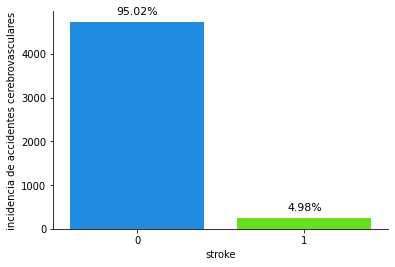

In [16]:
#数据集分布情况
ax = sns.countplot(x="stroke",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
               ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords = "offset points")
plt.show()

#### Conclusión: 
los usuarios de accidentes cerebrovasculares solo representan el 4,98%, y se puede ver que la distribución del conjunto de datos es desigual, por lo que se requiere un muestreo estratificado cuando los datos se dividen en conjuntos de datos de entrenamiento y prueba, y los datos deben procesarse SMOTE .

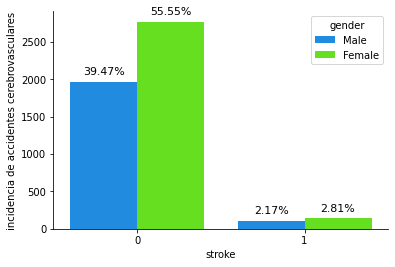

In [17]:
ax = sns.countplot(x="stroke",hue="gender",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
annot_plot(ax)
plt.show()

#### Conclusión: 
La figura muestra que la proporción de mujeres con la enfermedad es menor, pero la proporción de mujeres que no tienen la enfermedad también es menor. Debido a que la cantidad de hombres y mujeres en el conjunto de datos varía, es imposible juzgar directamente que los hombres son más propensos a la enfermedad.

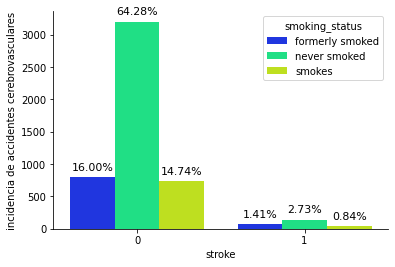

In [18]:
ax = sns.countplot(x="stroke",hue="smoking_status",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
annot_plot(ax)
plt.show()

#### Comparación:
las personas que no se reúnen en reuniones muestran que la enfermedad representa una proporción relativamente grande, y la no ocupación también representa la mayoría. Los datos allí son más y el rango de cantidad varía, lo cual es fácil. Por lo tanto, es Es fácil juzgar directamente si hay una enfermedad.

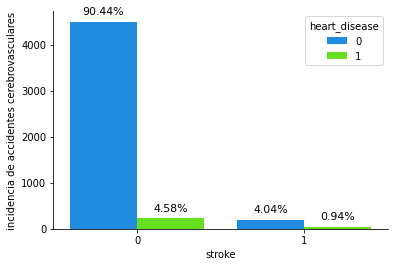

In [19]:
ax = sns.countplot(x="stroke",hue="heart_disease",data=df, palette="gist_rainbow_r")
plt.ylabel("incidencia de accidentes cerebrovasculares")
annot_plot(ax)
plt.show()

#### Conclusión: 
la figura muestra que los usuarios sin enfermedad cardíaca representan una gran proporción de la enfermedad, pero la proporción de usuarios sin enfermedad cardíaca sin enfermedad cardíaca también representa la mayor parte del duelo. Debido a que la cantidad de personas con enfermedad cardíaca en los datos El conjunto varía, es imposible determinar directamente si la enfermedad cardíaca no lo es. Es más probable que la enfermedad cause un accidente cerebrovascular.

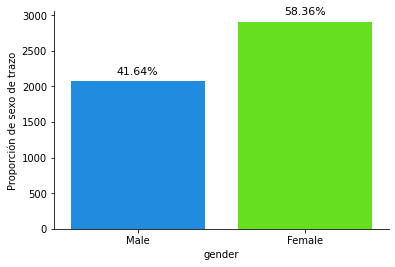

Female    2907
Male      2074
Name: gender, dtype: int64

In [20]:
# male and female
ax = sns.countplot(x=df.gender,data=df, palette="gist_rainbow_r")
plt.ylabel("Proporción de sexo de trazo")
annot_plot(ax)
plt.show()
df.gender.value_counts()

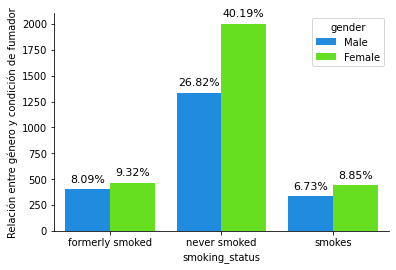

In [21]:
# smoking_status 
ax = sns.countplot(x = df.smoking_status,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("Relación entre género y condición de fumador")
annot_plot(ax)
plt.show()

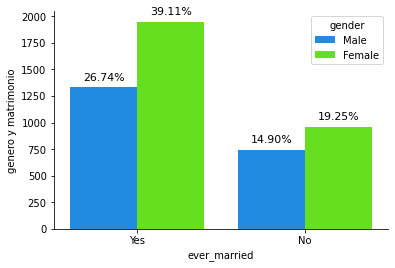

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [22]:
# ever_married
ax = sns.countplot(x = df.ever_married, hue= df.gender,data=df, palette="gist_rainbow_r")
plt.ylabel("genero y matrimonio")
annot_plot(ax)
plt.show()
df.ever_married.value_counts()

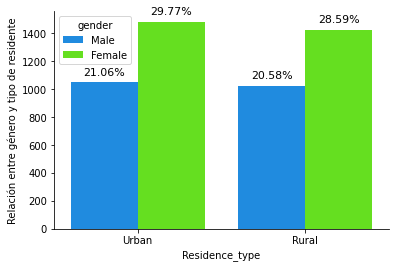

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [23]:
# Residence_type
ax = sns.countplot(x = df.Residence_type,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("Relación entre género y tipo de residente")
annot_plot(ax)
plt.show()
df.Residence_type.value_counts()

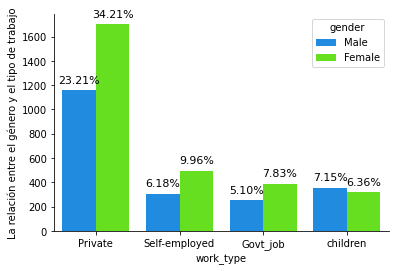

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [24]:
# work_type
ax = sns.countplot(x = df.work_type,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el género y el tipo de trabajo")
annot_plot(ax)
plt.show()
df.work_type.value_counts()

#### Para los valores atípicos del estado de tabaquismo, de acuerdo con el estado de vida real, elegimos el modo del conjunto de datos para reemplazar, primero reemplazamos el valor desconocido con el valor nulo y luego completamos el valor nulo con el modo.

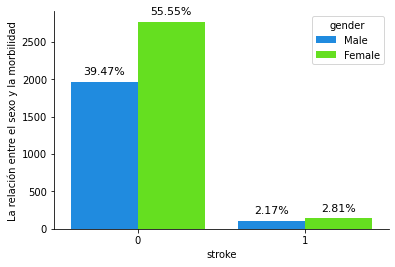

0    4733
1     248
Name: stroke, dtype: int64

In [25]:
# stroke 
#性别与发病率的关系
ax = sns.countplot(x = df.stroke,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el sexo y la morbilidad")
annot_plot(ax)
plt.show()
df.stroke.value_counts()

#### Conclusión:
La figura muestra que la proporción de mujeres con la enfermedad es menor, pero la proporción de mujeres que no tienen la enfermedad también es menor. Debido a que la cantidad de hombres y mujeres en el conjunto de datos varía, es imposible juzgar directamente que los hombres son más propensos a la enfermedad.

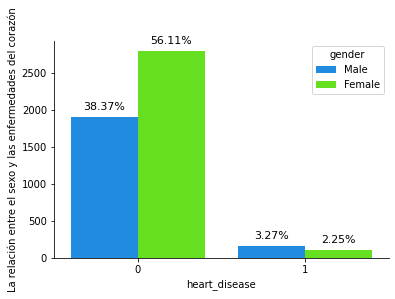

0    4706
1     275
Name: heart_disease, dtype: int64

In [26]:
# heart_disease 
ax = sns.countplot(x = df.heart_disease,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el sexo y las enfermedades del corazón")
annot_plot(ax)
plt.show()
df.heart_disease.value_counts()

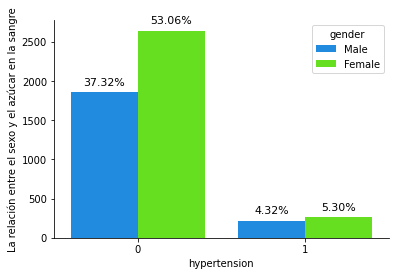

0    4502
1     479
Name: hypertension, dtype: int64

In [27]:
# hypertension 
ax = sns.countplot(x = df.hypertension,  hue= df.gender,data=df, palette='gist_rainbow_r')
plt.ylabel("La relación entre el sexo y el azúcar en la sangre")
annot_plot(ax)
plt.show()
df.hypertension.value_counts()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


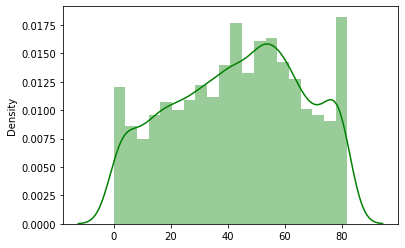

In [28]:
# age
sns.distplot(x = df.age, color="g")
plt.show()

### Análisis Preliminar de Variables Continuas

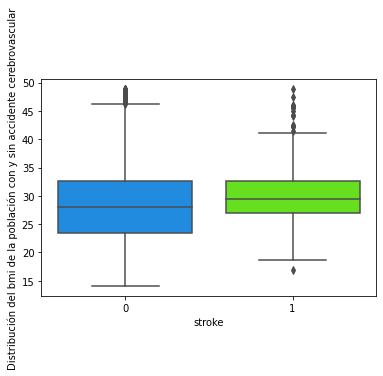

In [29]:
#bmi箱线图
sns.boxplot(x="stroke",y="bmi",data=df, palette='gist_rainbow_r')
plt.ylabel("Distribución del bmi de la población con y sin accidente cerebrovascular")
plt.show()

<AxesSubplot:ylabel='Density'>

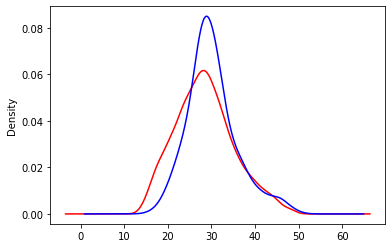

In [30]:
#bmi分布密度图
df["bmi"].plot.kde(color="red")
#患病用户密度分布
df.query("stroke==1")["bmi"].plot.kde(color="blue")

#### Conclusión: 
La distribución del bmi de las personas sin ictus tiene valores más discretos, mientras que el bmi de las personas con ictus está relativamente concentrado en un intervalo.

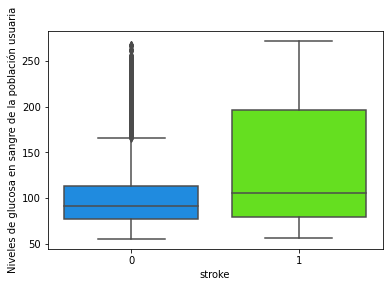

In [31]:
#血液中的葡萄糖水平的分布
sns.boxplot(x="stroke",y="avg_glucose_level",data=df, palette='gist_rainbow_r')
plt.ylabel("Niveles de glucosa en sangre de la población usuaria")
plt.show()

<AxesSubplot:ylabel='Density'>

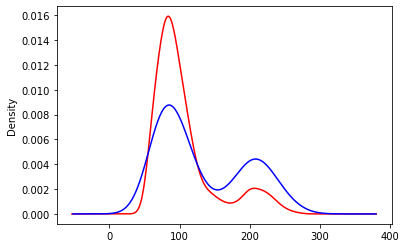

In [32]:
#avg_glucose_level分布密度图
df["avg_glucose_level"].plot.kde(color="red")
#患病用户密度分布
df.query("stroke==1")["avg_glucose_level"].plot.kde(color="blue")

#### Conclusión: 
Se puede observar que la población discreta de usuarios sin ictus está más distribuida, mientras que el nivel de glucosa en sangre de la población con ictus se distribuye en un intervalo relativamente estable.

### Extraer características

In [33]:
#提取特征
charges = df.drop(["stroke"],axis=1)
corrDf = charges.apply(lambda x:pd.factorize(x)[0])
corrDf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,1,1,1
2,1,2,0,1,0,0,0,2,2,2
3,1,3,1,1,0,1,1,3,3,1
4,0,4,0,1,0,0,0,4,4,0


In [34]:
#构造相关性矩阵
corr=corrDf.corr()
corr

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
gender,1.000000,-0.012168,-0.021485,0.086476,-0.028971,-0.063684,-0.004301,-0.003350,0.011963,0.021362
age,-0.012168,1.000000,-0.227529,0.210886,0.537537,0.271470,0.023700,0.041936,0.140965,0.085377
hypertension,-0.021485,-0.227529,1.000000,-0.111974,-0.164534,-0.073155,0.004755,-0.026456,-0.019053,-0.018090
heart_disease,0.086476,0.210886,-0.111974,1.000000,0.114765,0.056632,0.002125,0.019200,0.070082,0.016808
ever_married,-0.028971,0.537537,-0.164534,0.114765,1.000000,0.365538,0.008191,0.016706,0.120293,0.046520
work_type,-0.063684,0.271470,-0.073155,0.056632,0.365538,1.000000,-0.008475,0.017066,0.196876,-0.019969
Residence_type,-0.004301,0.023700,0.004755,0.002125,0.008191,-0.008475,1.000000,0.001438,-0.036646,-0.012773
avg_glucose_level,-0.003350,0.041936,-0.026456,0.019200,0.016706,0.017066,0.001438,1.000000,0.077228,0.006505
bmi,0.011963,0.140965,-0.019053,0.070082,0.120293,0.196876,-0.036646,0.077228,1.000000,-0.004289
smoking_status,0.021362,0.085377,-0.018090,0.016808,0.046520,-0.019969,-0.012773,0.006505,-0.004289,1.000000


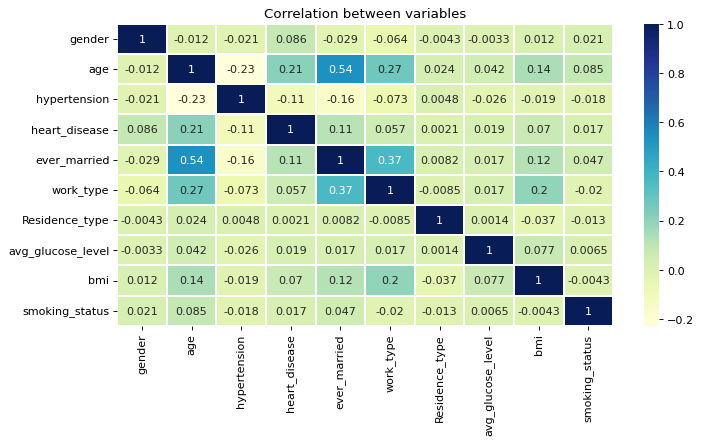

In [35]:
#绘制相关系数热力地图
plt.figure(figsize=(10,5),dpi=80)
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,
                linewidths=0.2,cmap="YlGnBu",annot=True)
plt.title("Correlation between variables")
plt.show()

#### Conclusión: 
A partir de la figura anterior, se puede ver que la edad, el tipo de trabajo, el estado civil, las enfermedades cardíacas, la hipertensión y el tabaquismo tienen correlaciones relativamente fuertes.

In [36]:
#使用one_hot编码查看数据之间的关系 Use la codificación one_hot para ver la relación entre los datos
one_hot_data = pd.get_dummies(df.iloc[:,1:])
one_hot_data.head(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.6,1,0,1,0,1,0,0,0,1,1,0,0
1,80,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0


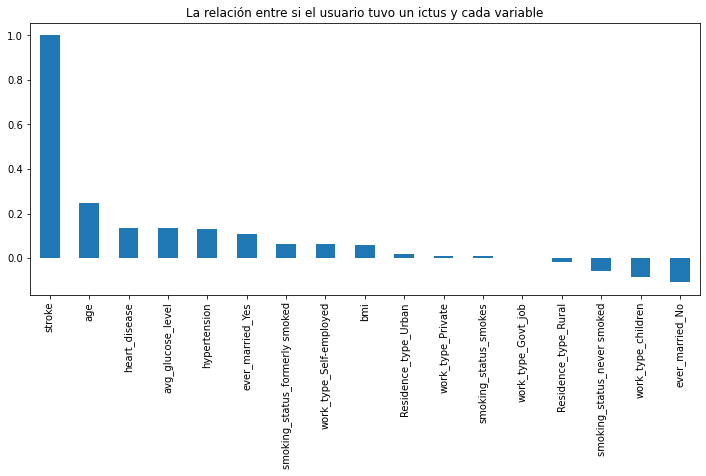

In [37]:
#用户是否有中风与各变量之间的关系
plt.figure(figsize=(12,5))
one_hot_data.corr()["stroke"].sort_values(ascending=False).plot(kind="bar")
plt.title("La relación entre si el usuario tuvo un ictus y cada variable")
plt.show()

#### Conclusión:
Se puede observar que la relación entre accidente cerebrovascular y género y tipo de residencia es pequeña, lo que directamente se puede descartar, por el alto coeficiente de correlación entre situación laboral y freelance se mantiene.

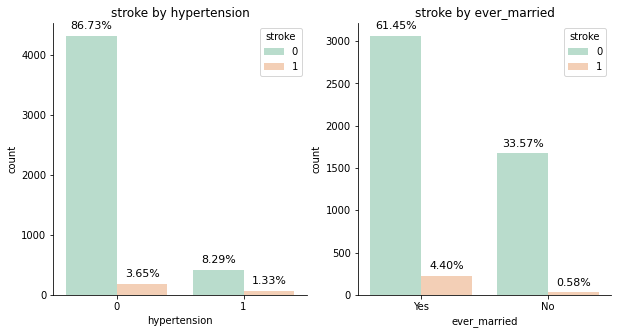

In [38]:
#中风与高血压和婚姻状态的关系
coveriables=["hypertension","ever_married"]
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
for i,item in enumerate(coveriables): #enumerate()函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    plt.subplot(1,2,(i+1))
    ax = sns.countplot(x=item,hue="stroke",data=df,palette="Pastel2")
    plt.xlabel(str(item))
    plt.title("stroke by "+str(item))
    i=i+1
    annot_plot(ax)
plt.show()

<AxesSubplot:xlabel='age'>

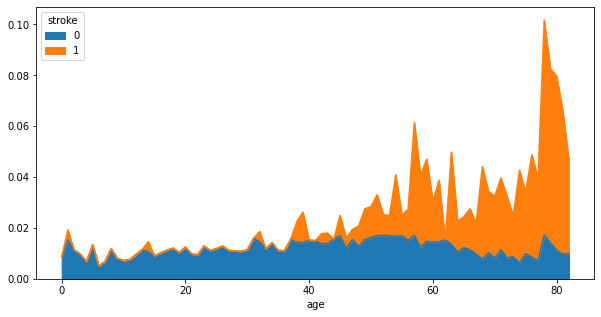

In [39]:
#求百分比绘图,更能准确反应区别
n = len(df)+1
nlist = range(1,n)
df['id'] = nlist

age_data = df.pivot_table(index="age",columns="stroke",values="id",aggfunc="count")
age_data = age_data.apply(lambda x:x/x.sum())
#绘制堆积面积图
age_data.plot.area(figsize=(10,5))

#### Conclusión: 
Se puede observar que con el aumento de la edad, la probabilidad de que un usuario sufra un ictus aumenta paulatinamente, tomando como límite los 40 años, a mayor edad mayor probabilidad de ictus.
#### Para resumir: 
seleccionamos todas las características excepto el género y el tipo de residencia para la formación modelo

### Procesamiento de datos de características

In [40]:
data_comvar = df.drop(["id","gender","Residence_type","stroke"],axis=1)
data_comvar.head(5)

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,67,0,1,Yes,Private,228.69,36.6,formerly smoked
1,80,0,1,Yes,Private,105.92,32.5,never smoked
2,49,0,0,Yes,Private,171.23,34.4,smokes
3,79,1,0,Yes,Self-employed,174.12,24.0,never smoked
4,81,0,0,Yes,Private,186.21,29.0,formerly smoked


In [41]:
#对连续变量进行标准化处理 Estandarizar Variables Continuas
scaler = StandardScaler(copy=False)
#fit_transform()先拟合数据，然后转化数据将其变成标准形式 Ajuste los datos primero, luego transforme los datos en una forma estándar
scaler.fit_transform(data_comvar[["age","avg_glucose_level","bmi"]])

array([[ 1.04011079e+00,  2.72341090e+00,  1.19323816e+00],
       [ 1.61326088e+00, -5.22766599e-04,  5.89389611e-01],
       [ 2.46518357e-01,  1.44852918e+00,  8.69221866e-01],
       ...,
       [ 7.01644829e-02, -2.42364234e-01,  4.86293516e-01],
       [-1.50277859e-01, -4.88199415e-01,  2.21189274e-01],
       [ 1.61326088e+00, -4.92415000e-01,  8.86371531e-02]])

In [42]:
#替换数据
data_comvar[["age","avg_glucose_level","bmi"]] = scaler.fit_transform(data_comvar[["age","avg_glucose_level","bmi"]])
data_comvar[["age","avg_glucose_level","bmi"]]

,age,avg_glucose_level,bmi
0,1.040111,2.723411,1.193238
1,1.613261,-0.000523,0.589390
2,0.246518,1.448529,0.869222
3,1.569172,1.512650,-0.662492
4,1.657349,1.780895,0.073909
...,...,...,...
4976,-0.106189,-0.794162,0.191733
4977,-0.150278,1.890500,0.383197
4978,0.070164,-0.242364,0.486294
4979,-0.150278,-0.488199,0.221189


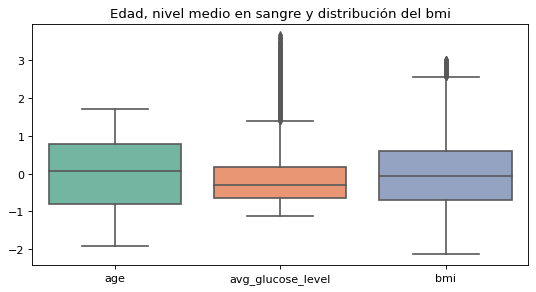

In [43]:
#使用箱线图查看是否存在异常值 Use un diagrama de caja para ver si hay valores atípicos
plt.figure(figsize=(8,4),dpi=80)
numbox=sns.boxplot(data=data_comvar[["age","avg_glucose_level","bmi"]],palette="Set2")
plt.title("Edad, nivel medio en sangre y distribución del bmi")
plt.show()

Hay muchos valores atípicos en el índice de avg_glucose_level, pero no necesariamente son valores atípicos. También hay algunos valores atípicos en bmi, y la distribución por edades es normal. Aquí, para entrenar el modelo, eliminamos los valores que son tanto en sangre como en sangre. niveles de glucosa y valores atípicos de bmi.

In [44]:
def detect_outliers(data,n,features):
    outlier_indices=[]
    for col in features:
        #第一个四分位点
        #Q1 = data[col].describe()["25%"]
        Q1=np.percentile(data[col],25)
        #第三个四分卫点
        #Q3 = data[col].describe()["75%"]
        Q3=np.percentile(data[col],75)
        IQR = Q3-Q1
        #极端上限和下限
        lower_limit = Q1-1.5*IQR
        upper_limit = Q3+1.5*IQR
        #查询异常值的索引
        outlier_col = data[(data[col]<lower_limit)|(data[col]>upper_limit)].index
        #保存
        outlier_indices.extend(outlier_col)
    from collections import Counter
    outlier_indices = Counter(outlier_indices)
    #若被n特特征同时判定为异常点才输出
    more_outliers = list(k for k,v in outlier_indices.items() if v>=n)
    return more_outliers

In [45]:
#异常值的索引 índice de valores atípicos
outliers = detect_outliers(data_comvar,2,["avg_glucose_level","bmi"])
outliers

[17, 53, 154, 368, 1411, 2116, 2683, 3341, 3683, 3994, 4329]

### eliminar valores atípicos

In [46]:
#Eliminar valores atípicos de conjuntos de datos de entidades
data_comvar = data_comvar.drop(outliers,axis=0).reset_index(drop=True)
data_comvar.head(2)

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,1.040111,0,1,Yes,Private,2.723411,1.193238,formerly smoked
1,1.613261,0,1,Yes,Private,-0.000523,0.589390,never smoked


In [47]:
#Eliminar valores atípicos del conjunto de datos original
data = df.drop(outliers,axis=0).reset_index(drop=True)
data.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,id
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2


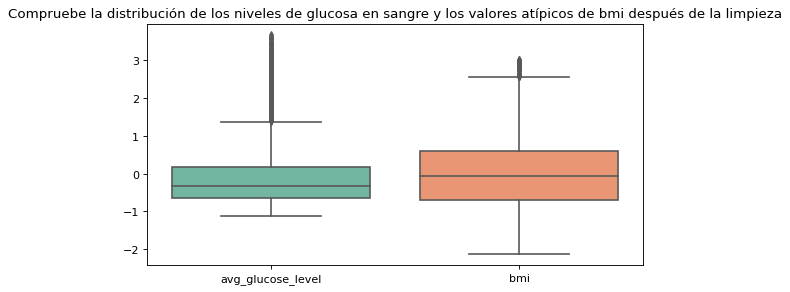

In [48]:
#检查异常值是否清理完成 Comprobar si los valores atípicos se limpian
plt.figure(figsize=(8,4),dpi=80)
numbox = sns.boxplot(data = data_comvar[["avg_glucose_level","bmi"]],palette="Set2")
plt.title("Compruebe la distribución de los niveles de glucosa en sangre y los valores atípicos de bmi después de la limpieza")
plt.show()

In [49]:
#查看对象类型字段里面存在的值
#Ver el valor que existe en el tipo de objeto
def uni(columnlabel):
    print(columnlabel,"-----",data_comvar[columnlabel].unique())
data_comvar_object = data_comvar.select_dtypes(["object"])
for i in range(0,len(data_comvar_object.columns)):
    uni(data_comvar_object.columns[i])

ever_married ----- ['Yes' 'No']
work_type ----- ['Private' 'Self-employed' 'Govt_job' 'children']
smoking_status ----- ['formerly smoked' 'never smoked' 'smokes']


#### Regularización y etiquetado de datos

In [50]:
#使用scikit_learn标签编码，将分类数据转换为整数编码
def labelencode(columnlabel):
    data_comvar[columnlabel] = LabelEncoder().fit_transform(data_comvar[columnlabel])
#进行标签编码：
for i in range(0,len(data_comvar_object.columns)):
    labelencode(data_comvar_object.columns[i])
#展示
for i in range(0,len(data_comvar_object.columns)):
    uni(data_comvar_object.columns[i])

ever_married ----- [1 0]
work_type ----- [1 2 0 3]
smoking_status ----- [0 1 2]


In [51]:
data_comvar.head()


,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,1.040111,0,1,1,1,2.723411,1.193238,0
1,1.613261,0,1,1,1,-0.000523,0.589390,1
2,0.246518,0,0,1,1,1.448529,0.869222,2
3,1.569172,1,0,1,2,1.512650,-0.662492,1
4,1.657349,0,0,1,1,1.780895,0.073909,0


### Construye el modelo

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [53]:
X=data_comvar
y=data["stroke"].values

spl = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
print(spl)
print("El número de grupos en los que se dividen los conjuntos de datos de entrenamiento y prueba：",spl.get_n_splits(X,y))

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
El número de grupos en los que se dividen los conjuntos de datos de entrenamiento y prueba： 5


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0)


In [55]:
#Train
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

#Test
print('X_test shape:',X_test.shape)
print('y_test:',y_test.shape)

X_train shape: (3479, 8)
y_train shape: (3479,)
X_test shape: (1491, 8)
y_test: (1491,)


Dado que la distribución de la muestra utilizada en este análisis está desequilibrada, la función SMOTE se utiliza para el procesamiento.

In [56]:
#Usando SMOTE para lidiar con el problema del desequilibrio de datos
smo = SMOTE(random_state=42)
x_smo,y_smo = smo.fit_resample(X_train,y_train)
print(x_smo.shape,y_smo.shape)

(6596, 8) (6596,)


### Elija un modelo de algoritmo

In [57]:
Classifiers=[
    ["Random Forest",RandomForestClassifier()],
    ["Support Vector Machine",SVC()],
    ["LogisticRegression",LogisticRegression()],
    ["KNN",KNeighborsClassifier()],
    ["Naive Bayes",GaussianNB()],
    ["Decision Tree",DecisionTreeClassifier()],
    ["AdaBoostClassifier",AdaBoostClassifier()],
    ["GradientBoostingClassifier",GradientBoostingClassifier()],
    ["XGB",XGBClassifier()],
    ["CatBoost",CatBoostClassifier()]
]

### Sustituir los datos de entrenamiento para entrenar el modelo

In [58]:
#训练模型 Entrena al modelo
Classify_result=[]
names=[]
prediction=[]
for name,classifier in Classifiers:
    classifier = classifier
    #训练模型 Entrena al modelo
    classifier.fit(x_smo,y_smo)
    #目标预测值 valor predicho objetivo
    y_pred = classifier.predict(X_test)
    #召回率
    recall = recall_score(y_test,y_pred)
    #准确率
    precision = precision_score(y_test,y_pred)
    #f1综合得分
    f1 = f1_score(y_test,y_pred)
    #准确度
    accuracy=accuracy_score(y_test,y_pred)
    #评估结果合并
    class_eva = pd.DataFrame([recall,precision,f1,accuracy])
    Classify_result.append(class_eva)
    #模型名称
    name=pd.Series(name)
    names.append(name)
    #预测结果
    y_pred = pd.Series(y_pred)
    prediction.append(y_pred)

Learning rate set to 0.023055
0:	learn: 0.6798120	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.6677408	total: 67.4ms	remaining: 33.6s
2:	learn: 0.6555688	total: 70.1ms	remaining: 23.3s
3:	learn: 0.6442200	total: 72.8ms	remaining: 18.1s
4:	learn: 0.6306220	total: 76.3ms	remaining: 15.2s
5:	learn: 0.6200710	total: 79.2ms	remaining: 13.1s
6:	learn: 0.6102209	total: 81.9ms	remaining: 11.6s
7:	learn: 0.6000638	total: 84.7ms	remaining: 10.5s
8:	learn: 0.5912234	total: 87.5ms	remaining: 9.63s
9:	learn: 0.5824152	total: 90.3ms	remaining: 8.94s
10:	learn: 0.5737445	total: 93.2ms	remaining: 8.38s
11:	learn: 0.5660300	total: 95.9ms	remaining: 7.9s
12:	learn: 0.5574727	total: 98.8ms	remaining: 7.5s
13:	learn: 0.5509804	total: 102ms	remaining: 7.16s
14:	learn: 0.5448103	total: 105ms	remaining: 6.86s
15:	learn: 0.5385222	total: 107ms	remaining: 6.6s
16:	learn: 0.5323218	total: 110ms	remaining: 6.36s
17:	learn: 0.5260961	total: 113ms	remaining: 6.15s
18:	learn: 0.5214479	total: 116ms	remaining: 5.97s
1

200:	learn: 0.3206672	total: 769ms	remaining: 3.06s
201:	learn: 0.3203273	total: 779ms	remaining: 3.08s
202:	learn: 0.3200235	total: 786ms	remaining: 3.08s
203:	learn: 0.3195479	total: 791ms	remaining: 3.08s
204:	learn: 0.3191545	total: 796ms	remaining: 3.08s
205:	learn: 0.3189038	total: 798ms	remaining: 3.08s
206:	learn: 0.3184762	total: 802ms	remaining: 3.07s
207:	learn: 0.3182230	total: 807ms	remaining: 3.07s
208:	learn: 0.3179798	total: 810ms	remaining: 3.06s
209:	learn: 0.3175664	total: 813ms	remaining: 3.06s
210:	learn: 0.3171562	total: 815ms	remaining: 3.05s
211:	learn: 0.3166595	total: 819ms	remaining: 3.04s
212:	learn: 0.3162030	total: 822ms	remaining: 3.04s
213:	learn: 0.3156969	total: 825ms	remaining: 3.03s
214:	learn: 0.3151968	total: 828ms	remaining: 3.02s
215:	learn: 0.3149818	total: 831ms	remaining: 3.02s
216:	learn: 0.3147482	total: 834ms	remaining: 3.01s
217:	learn: 0.3143440	total: 837ms	remaining: 3s
218:	learn: 0.3137527	total: 840ms	remaining: 3s
219:	learn: 0.3131

398:	learn: 0.2529136	total: 1.58s	remaining: 2.39s
399:	learn: 0.2524418	total: 1.59s	remaining: 2.38s
400:	learn: 0.2522203	total: 1.59s	remaining: 2.38s
401:	learn: 0.2517570	total: 1.59s	remaining: 2.37s
402:	learn: 0.2515224	total: 1.6s	remaining: 2.37s
403:	learn: 0.2513212	total: 1.61s	remaining: 2.37s
404:	learn: 0.2511478	total: 1.61s	remaining: 2.37s
405:	learn: 0.2508991	total: 1.62s	remaining: 2.37s
406:	learn: 0.2507436	total: 1.62s	remaining: 2.37s
407:	learn: 0.2503370	total: 1.63s	remaining: 2.36s
408:	learn: 0.2501042	total: 1.63s	remaining: 2.36s
409:	learn: 0.2497242	total: 1.63s	remaining: 2.35s
410:	learn: 0.2491714	total: 1.64s	remaining: 2.35s
411:	learn: 0.2488520	total: 1.64s	remaining: 2.34s
412:	learn: 0.2486028	total: 1.64s	remaining: 2.34s
413:	learn: 0.2483409	total: 1.65s	remaining: 2.33s
414:	learn: 0.2480279	total: 1.65s	remaining: 2.33s
415:	learn: 0.2477523	total: 1.65s	remaining: 2.32s
416:	learn: 0.2474892	total: 1.66s	remaining: 2.32s
417:	learn: 0

572:	learn: 0.2019597	total: 2.15s	remaining: 1.6s
573:	learn: 0.2018289	total: 2.16s	remaining: 1.6s
574:	learn: 0.2015936	total: 2.16s	remaining: 1.6s
575:	learn: 0.2011104	total: 2.17s	remaining: 1.59s
576:	learn: 0.2009147	total: 2.17s	remaining: 1.59s
577:	learn: 0.2005295	total: 2.17s	remaining: 1.58s
578:	learn: 0.2003780	total: 2.18s	remaining: 1.58s
579:	learn: 0.2002343	total: 2.18s	remaining: 1.58s
580:	learn: 0.2000042	total: 2.19s	remaining: 1.58s
581:	learn: 0.1997557	total: 2.19s	remaining: 1.58s
582:	learn: 0.1996385	total: 2.2s	remaining: 1.57s
583:	learn: 0.1994481	total: 2.2s	remaining: 1.57s
584:	learn: 0.1992348	total: 2.21s	remaining: 1.57s
585:	learn: 0.1990306	total: 2.21s	remaining: 1.56s
586:	learn: 0.1988679	total: 2.22s	remaining: 1.56s
587:	learn: 0.1987431	total: 2.22s	remaining: 1.56s
588:	learn: 0.1985588	total: 2.23s	remaining: 1.55s
589:	learn: 0.1984177	total: 2.23s	remaining: 1.55s
590:	learn: 0.1981362	total: 2.23s	remaining: 1.54s
591:	learn: 0.197

761:	learn: 0.1618267	total: 2.96s	remaining: 924ms
762:	learn: 0.1615444	total: 2.97s	remaining: 923ms
763:	learn: 0.1614636	total: 2.98s	remaining: 919ms
764:	learn: 0.1613143	total: 2.98s	remaining: 916ms
765:	learn: 0.1612319	total: 2.98s	remaining: 912ms
766:	learn: 0.1610998	total: 2.99s	remaining: 907ms
767:	learn: 0.1607220	total: 2.99s	remaining: 903ms
768:	learn: 0.1605244	total: 2.99s	remaining: 899ms
769:	learn: 0.1604105	total: 3s	remaining: 895ms
770:	learn: 0.1601991	total: 3s	remaining: 891ms
771:	learn: 0.1598465	total: 3s	remaining: 887ms
772:	learn: 0.1595669	total: 3s	remaining: 883ms
773:	learn: 0.1592028	total: 3.01s	remaining: 879ms
774:	learn: 0.1589667	total: 3.01s	remaining: 875ms
775:	learn: 0.1588072	total: 3.01s	remaining: 870ms
776:	learn: 0.1586856	total: 3.02s	remaining: 866ms
777:	learn: 0.1586239	total: 3.02s	remaining: 862ms
778:	learn: 0.1585051	total: 3.02s	remaining: 858ms
779:	learn: 0.1582806	total: 3.03s	remaining: 854ms
780:	learn: 0.1581264	to

930:	learn: 0.1332479	total: 3.56s	remaining: 264ms
931:	learn: 0.1332057	total: 3.56s	remaining: 260ms
932:	learn: 0.1327789	total: 3.56s	remaining: 256ms
933:	learn: 0.1326464	total: 3.57s	remaining: 252ms
934:	learn: 0.1325250	total: 3.57s	remaining: 248ms
935:	learn: 0.1323723	total: 3.58s	remaining: 245ms
936:	learn: 0.1322607	total: 3.58s	remaining: 241ms
937:	learn: 0.1321505	total: 3.58s	remaining: 237ms
938:	learn: 0.1319588	total: 3.59s	remaining: 233ms
939:	learn: 0.1318342	total: 3.59s	remaining: 229ms
940:	learn: 0.1317404	total: 3.59s	remaining: 225ms
941:	learn: 0.1316222	total: 3.6s	remaining: 222ms
942:	learn: 0.1315090	total: 3.6s	remaining: 218ms
943:	learn: 0.1314485	total: 3.6s	remaining: 214ms
944:	learn: 0.1313273	total: 3.61s	remaining: 210ms
945:	learn: 0.1312139	total: 3.61s	remaining: 206ms
946:	learn: 0.1309770	total: 3.61s	remaining: 202ms
947:	learn: 0.1308748	total: 3.62s	remaining: 198ms
948:	learn: 0.1306551	total: 3.62s	remaining: 194ms
949:	learn: 0.1

In [59]:
# Import algoritmos de ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
#import lightgbm 
#import catboost
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

#Import Funciones para mejores hiperparametros
from sklearn.model_selection import GridSearchCV, KFold
import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold #交叉验证


In [60]:
model = XGBClassifier()               
learning_rate = [0.0001,0.001,0.01,0.1,0.2,0.3] #学习率
gamma = [1, 0.1, 0.01, 0.001]
 
param_grid = dict(learning_rate = learning_rate,gamma = gamma)#转化为字典格式，网络搜索要求
 
kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)#将训练/测试数据集划分10个互斥子集，
 
grid_search = GridSearchCV(model,param_grid,scoring = 'neg_log_loss',n_jobs = -1,cv = kflod)
#scoring指定损失函数类型，n_jobs指定全部cpu跑，cv指定交叉验证
grid_result = grid_search.fit(X_train, y_train) #运行网格搜索
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
#grid_scores_：给出不同参数情况下的评价结果。best_params_：描述了已取得最佳结果的参数的组合
#best_score_：成员提供优化过程期间观察到的最好的评分
#具有键作为列标题和值作为列的dict，可以导入到DataFrame中。
#注意，“params”键用于存储所有参数候选项的参数设置列表。
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))


Best: -0.178046 using {'gamma': 1, 'learning_rate': 0.1}
-0.685124  with:   {'gamma': 1, 'learning_rate': 0.0001}
-0.619546  with:   {'gamma': 1, 'learning_rate': 0.001}
-0.300664  with:   {'gamma': 1, 'learning_rate': 0.01}
-0.178046  with:   {'gamma': 1, 'learning_rate': 0.1}
-0.182133  with:   {'gamma': 1, 'learning_rate': 0.2}
-0.183336  with:   {'gamma': 1, 'learning_rate': 0.3}
-0.685124  with:   {'gamma': 0.1, 'learning_rate': 0.0001}
-0.619556  with:   {'gamma': 0.1, 'learning_rate': 0.001}
-0.301011  with:   {'gamma': 0.1, 'learning_rate': 0.01}
-0.182150  with:   {'gamma': 0.1, 'learning_rate': 0.1}
-0.202110  with:   {'gamma': 0.1, 'learning_rate': 0.2}
-0.221335  with:   {'gamma': 0.1, 'learning_rate': 0.3}
-0.685123  with:   {'gamma': 0.01, 'learning_rate': 0.0001}
-0.619541  with:   {'gamma': 0.01, 'learning_rate': 0.001}
-0.301034  with:   {'gamma': 0.01, 'learning_rate': 0.01}
-0.183236  with:   {'gamma': 0.01, 'learning_rate': 0.1}
-0.203422  with:   {'gamma': 0.01, 'l

In [61]:
model = KNeighborsClassifier()               
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
   
grid_search = GridSearchCV(model,param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

grid_result = grid_search.fit(X_train, y_train) #运行网格搜索
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best: 0.947974 using {'n_neighbors': 12}


In [62]:
model = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth': range(1, 6)}
kfold = KFold(n_splits=10)

grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
reg = grid.best_estimator_

print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

NameError: name 'grid' is not defined

In [63]:
model = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],

              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],

              'kernel': ['rbf']}
kfold = KFold(n_splits=10)

grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
reg = grid.best_estimator_

print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

NameError: name 'grid' is not defined

In [ ]:
model = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
kfold = KFold(n_splits=10)

grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
reg = grid.best_estimator_

print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

In [ ]:
# model = GaussianNB()
# param_grid =  {
#         'priors':[0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
#         'var_smoothing':range(2,15,1)
#         }
# kfold = KFold(n_splits=10)

# grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
# grid_result = grid_search.fit(X_train, y_train)
# reg = grid.best_estimator_

# print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

### Evaluación del modelo

In [ ]:
#评估模型
"""recall召回率：原本为对的当中，预测为对的比例（值越大越好，1为理想状态）
precision精确率：预测为对的当中，原本为对的比例（值越大越好，1为理想状态）
F1-Score F1分数：指标综合了Precision和recall的产出结果
accuracy_score: 取值范围0-1，1代表模型输出的结果最好，0代表模型输出结果最差
"""
names = pd.DataFrame(names)
names = names[0].tolist()
#将各个结果合并在一起
result = pd.concat(Classify_result,axis=1)
result.columns = names
result.index=["recall","precision","F1_score","accuracy_score"]
result

#### Conclusión: 
De acuerdo con el F1_score, LogisticRegression, AdaBoostClassifier y GradientBoostingClassifier son altos, y luego  Naive Bayes y CatBoost, elegimos LogisticRegression este algoritmo de predicción.

### plan de IMPLEMENTACION

Aquí no hay un conjunto de datos de predicción, usamos las últimas 100 filas de datos como conjunto de datos de predicción.

In [ ]:
#预测数据集特征
pred_X = data_comvar.tail(100)
#提取id
pred_id = data["id"].tail(100)

#使用线性回归方法，预测用户中风情况 
#Uso de métodos LogisticRegression para predecir accidentes cerebrovasculares en usuarios
model = LogisticRegression()
model.fit(X_train,y_train)
pred_y = model.predict(pred_X)

#预测结果 resultado
predDf = pd.DataFrame({"id":pred_id,"stroke":pred_y})
predDf

### Conclusión Recomendaciones

#### En conclusión:

* Existe una correlación significativa entre el ictus y la edad, y con la edad de 40 años como punto de corte, el riesgo de ictus aumenta aún más con la edad;
*  El nivel de glucosa en sangre de la población con accidente cerebrovascular se distribuye en un rango relativamente concentrado, alrededor de 77,24 a 114,09.
* La distribución de datos es desigual, el entrenamiento del modelo es insuficiente y es necesario mejorar la precisión de la predicción.
#### Sugerir:

1. Se recomienda que los usuarios, especialmente los mayores de 40 años, eviten el riesgo de accidente cerebrovascular debido a las dos dimensiones de los hábitos de vida y las inspecciones periódicas, vivan una vida normal, presten atención a la dieta y, al mismo tiempo, aumenten la frecuencia. de exámenes físicos y exámenes físicos regulares para hacer un buen trabajo en la prevención;
2. Aunque el nivel de azúcar en la sangre de los pacientes con accidente cerebrovascular está relativamente concentrado en un cierto rango, este rango también se superpone en gran medida con el rango de nivel de azúcar en la sangre de las personas sin accidente cerebrovascular. Los usuarios con este nivel de azúcar en la sangre no necesitan estar demasiado nerviosos, la sangre el azúcar es demasiado alto o si es demasiado bajo, el riesgo de accidente cerebrovascular puede ser pequeño, pero aumentará el riesgo de otras enfermedades Por lo tanto, mantenga hábitos de vida saludables y exámenes físicos regulares para la prevención;
3. Recopilación complementaria de la recopilación de datos correspondiente para pacientes con accidente cerebrovascular, así como la expansión de más datos característicos, para entrenar aún más el modelo de máquina y mejorar la precisión de la predicción.